# Análise Banco de Dados Original

## Importando Biblioteca

In [2]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando Banco de Dados

In [4]:
df = pd.read_csv('DelayedFlights.zip')

Mostrar todas as colunas

In [5]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [7]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [8]:
# Excluindo colunas que não serão utilizadas na análise
df.drop(['Year','TaxiIn', 'TaxiOut', 'TailNum', 'FlightNum', 'UniqueCarrier',
        'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

In [9]:
df.shape

(1936758, 19)

In [10]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
ActualElapsedTime     673
CRSElapsedTime        515
AirTime               650
ArrDelay             1128
DepDelay             1058
Origin                303
Dest                  304
Distance             1419
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

In [12]:
print('Verificando se há valores de tempo negativos e zerados')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo negativos e zerados
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 7


'CRSElapsedTime' registra o tempo de voo programado em minutos, valores negativos são valores incosistentes, logo, precisam ser retirados.

In [13]:
df = df[df['CRSElapsedTime']>=0]

Os valores de AirTime serão tratados posteriormente para não excluir voos cancelados e desviados

In [14]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 7


In [15]:
len(df)

1936554

Verificando valores nulos

In [16]:
df.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    689067
SecurityDelay        689067
NASDelay             689067
WeatherDelay         689067
CarrierDelay         689067
ActualElapsedTime      8184
AirTime                8184
ArrDelay               8184
Cancelled                 0
Diverted                  0
CancellationCode          0
Month                     0
Distance                  0
DayofMonth                0
Origin                    0
DepDelay                  0
CRSElapsedTime            0
DayOfWeek                 0
Dest                      0
dtype: int64

In [17]:
df.fillna(0, inplace=True)

In [19]:
df.describe()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06,1.936554e+06
mean,6.111321e+00,1.575366e+01,3.984850e+00,1.327426e+02,1.343032e+02,1.078196e+02,4.202152e+01,4.318486e+01,7.657069e+02,3.268693e-04,3.899194e-03,1.235497e+01,2.385764e+00,9.676627e+00,5.806448e-02,1.629541e+01
std,3.482574e+00,8.776179e+00,1.995967e+00,7.242574e+01,7.134106e+01,6.885660e+01,5.673069e+01,5.340361e+01,5.744987e+02,1.807658e-02,6.232169e-02,3.613661e+01,1.734126e+01,2.809088e+01,1.624019e+00,3.586049e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.650000e+02,1.650000e+02,1.370000e+02,5.500000e+01,5.300000e+01,9.980000e+02,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Separando variavéis para verificar correlações

In [20]:
lista_var_continuas = ['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance',
                       'CarrierDelay','WeatherDelay','SecurityDelay',
                       'NASDelay','LateAircraftDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']
df_continua = df[lista_var_continuas]
df_discreta = df[lista_var_discretas]

In [21]:
print(df_continua.describe())

       ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay  \
count       1.936554e+06    1.936554e+06  1.936554e+06  1.936554e+06   
mean        1.327426e+02    1.343032e+02  1.078196e+02  4.202152e+01   
std         7.242574e+01    7.134106e+01  6.885660e+01  5.673069e+01   
min         0.000000e+00    1.000000e+00  0.000000e+00 -1.090000e+02   
25%         8.000000e+01    8.200000e+01  5.800000e+01  9.000000e+00   
50%         1.160000e+02    1.160000e+02  9.000000e+01  2.400000e+01   
75%         1.650000e+02    1.650000e+02  1.370000e+02  5.500000e+01   
max         1.114000e+03    6.600000e+02  1.091000e+03  2.461000e+03   

           DepDelay      Distance  CarrierDelay  WeatherDelay  SecurityDelay  \
count  1.936554e+06  1.936554e+06  1.936554e+06  1.936554e+06   1.936554e+06   
mean   4.318486e+01  7.657069e+02  1.235497e+01  2.385764e+00   5.806448e-02   
std    5.340361e+01  5.744987e+02  3.613661e+01  1.734126e+01   1.624019e+00   
min    6.000000e+00  1.100000e+

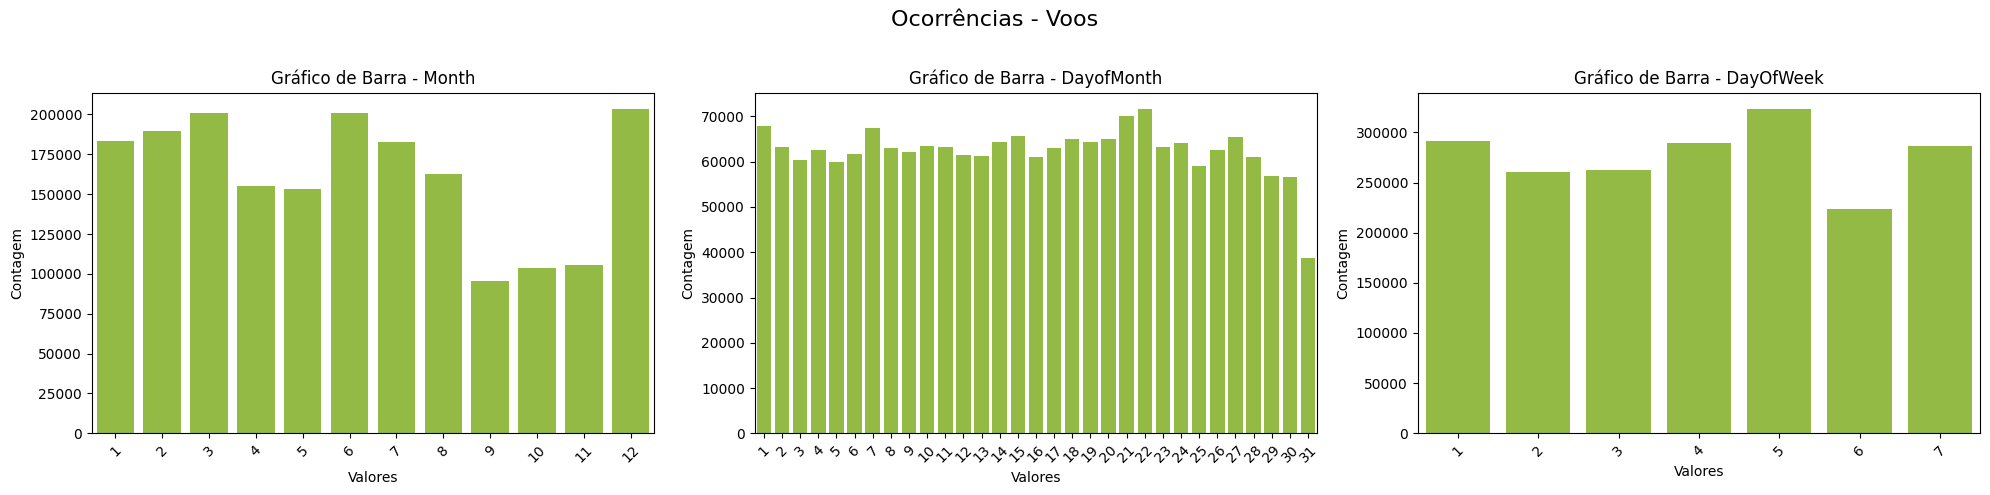

In [22]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df_discreta[[i]], ax=ax, color='YellowGreen')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos', fontsize=16)
# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

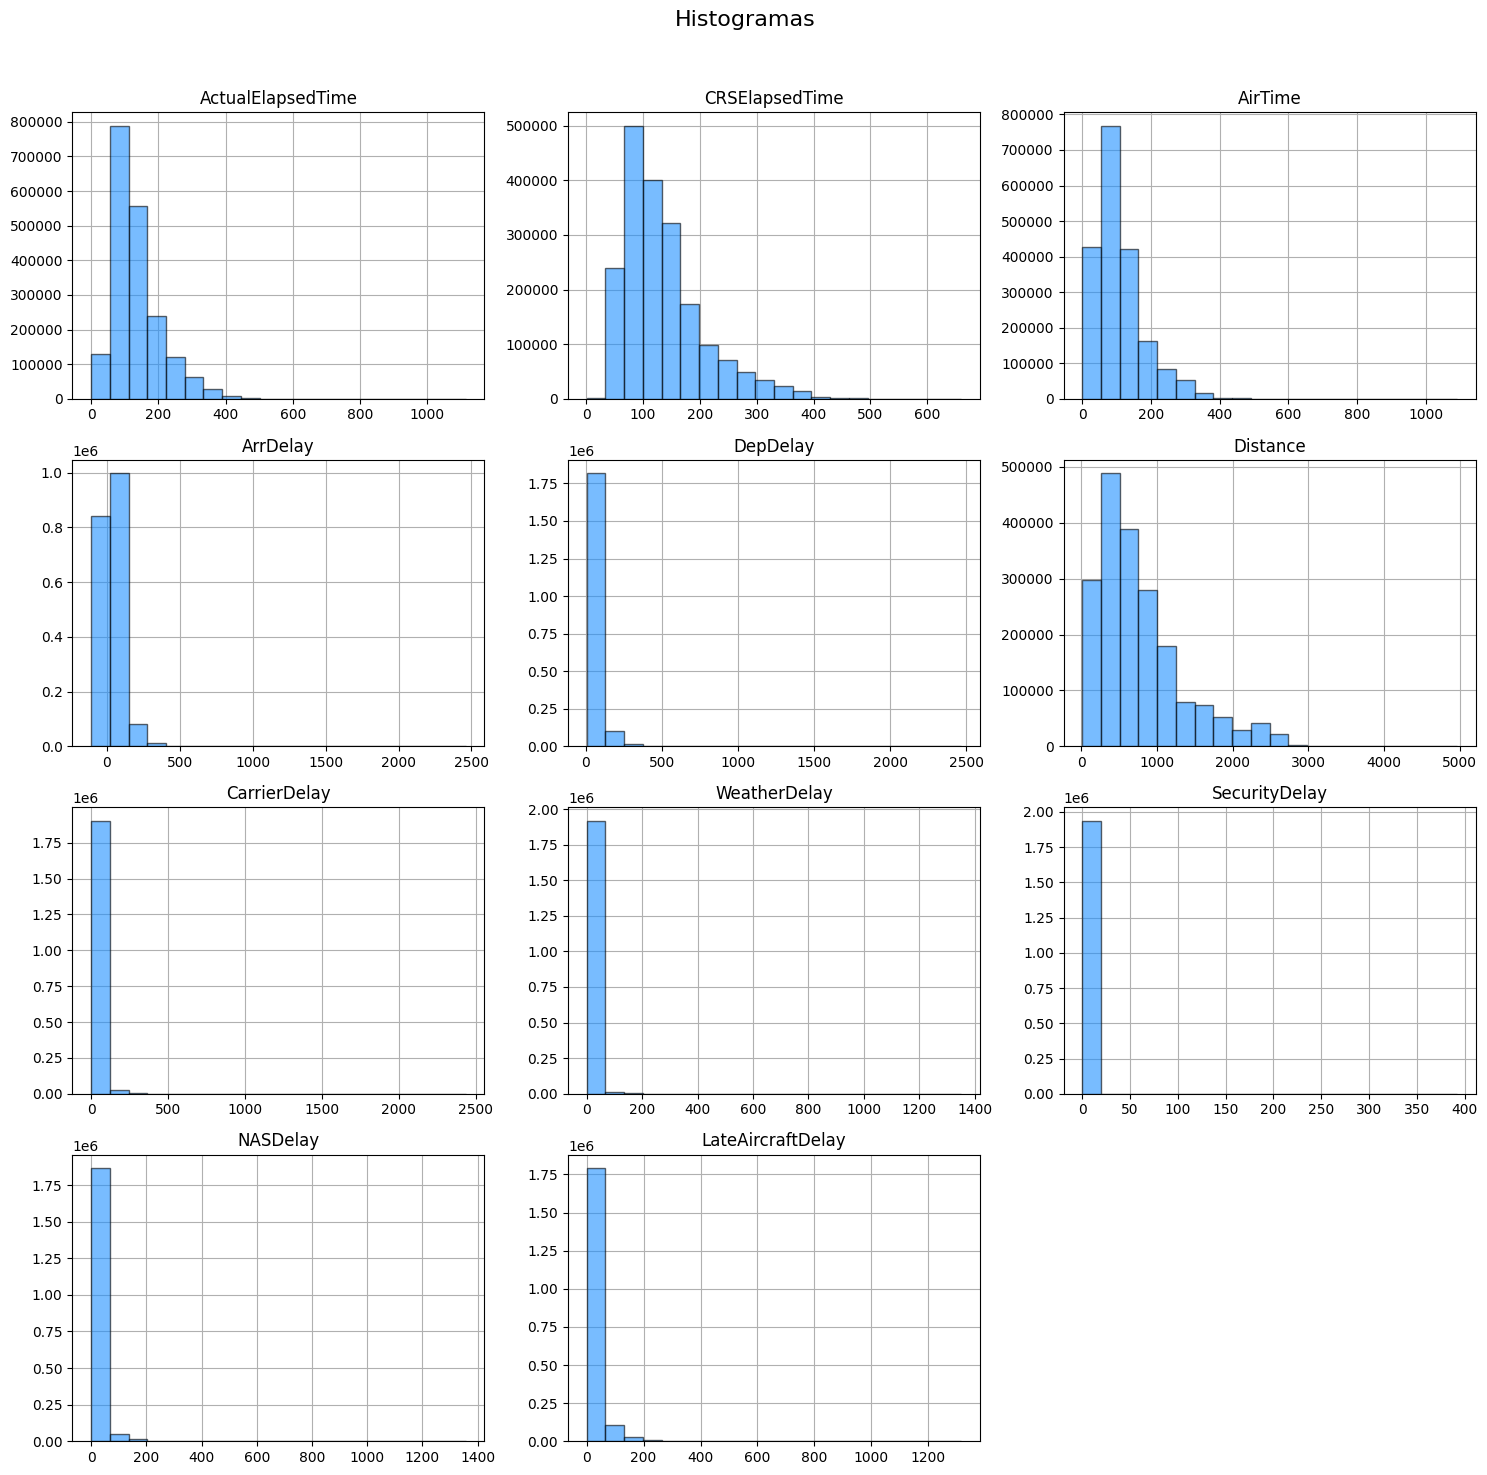

In [23]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(4, 3, figsize=(15, 15))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df_continua[i].hist(bins=20, edgecolor='black', alpha=0.6, color ='DodgerBlue',ax=ax, zorder=4)
    ax.set_title(f'{i}')
axs.flatten()[11].axis('off')
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

Análise de outliers e comportamento de cada variável

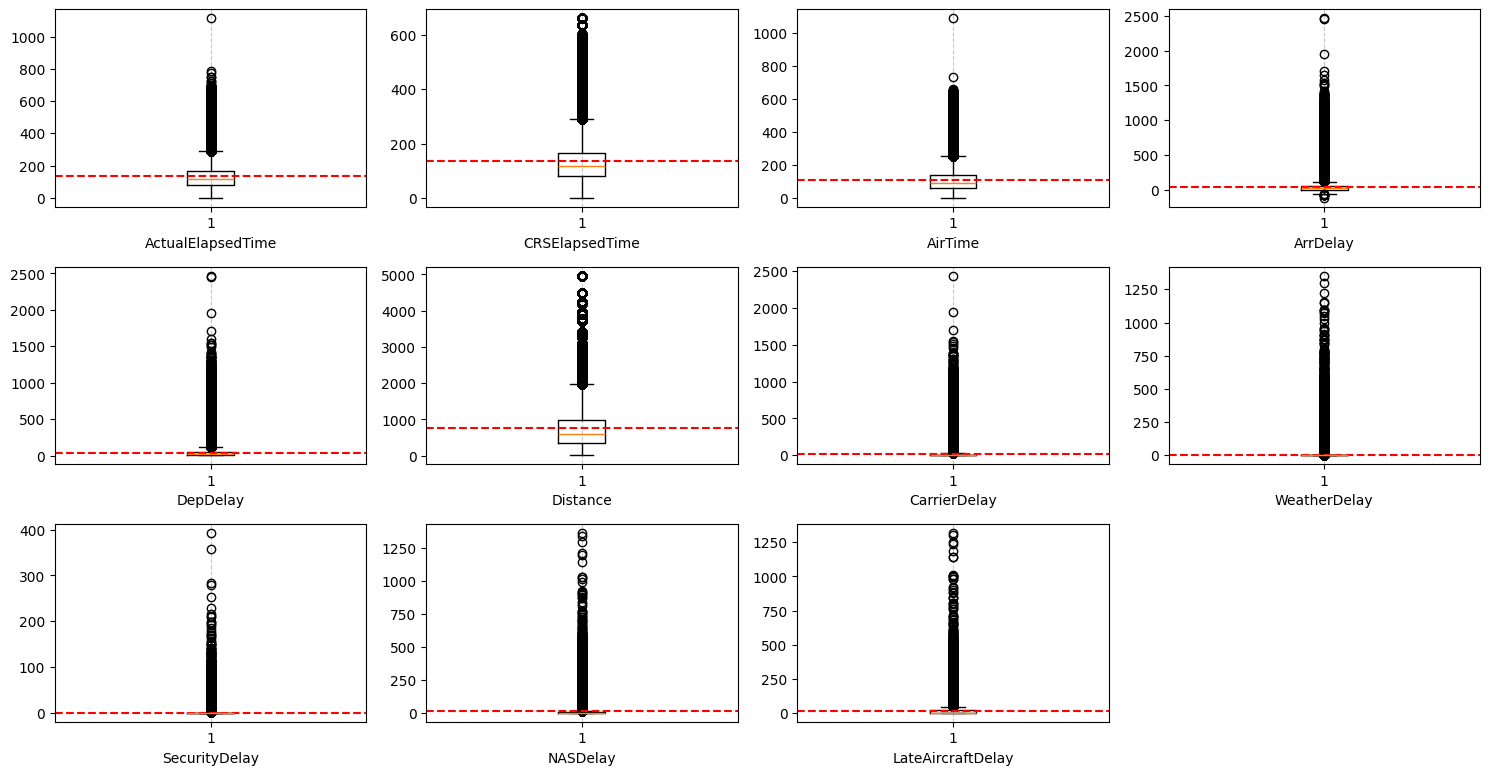

In [24]:
fig = plt.figure(figsize = (15,10))

for i, col in enumerate(df_continua):
    plt.subplot(4,4,i+1)
    plt.boxplot(df_continua[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df_continua[col].mean(), linestyle='--', color="red")
    
plt.tight_layout()     
plt.show()

Mapa de calor para correlação

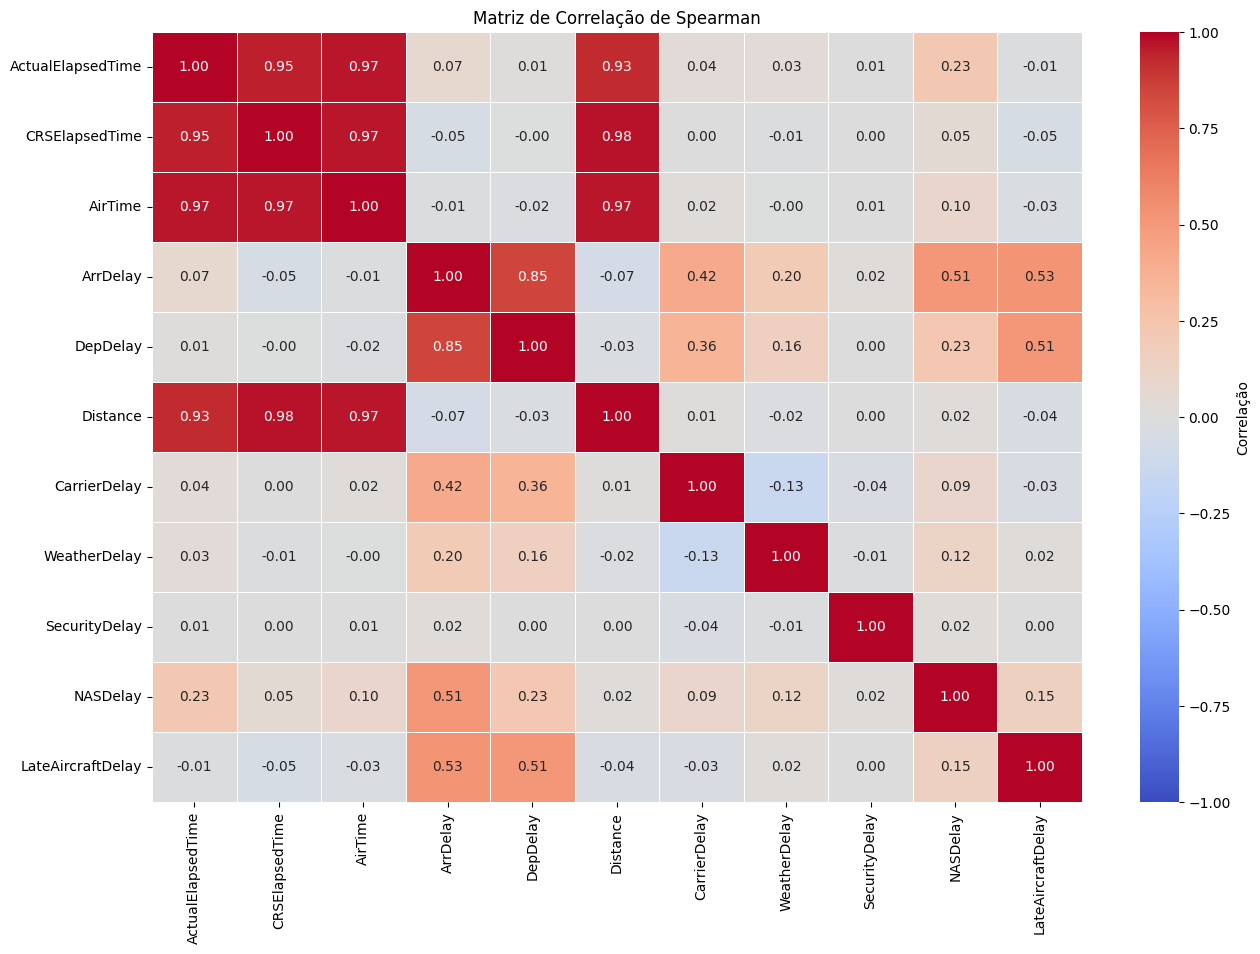

In [25]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_continua.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

Análise dos Destinos e Origens mais procurados

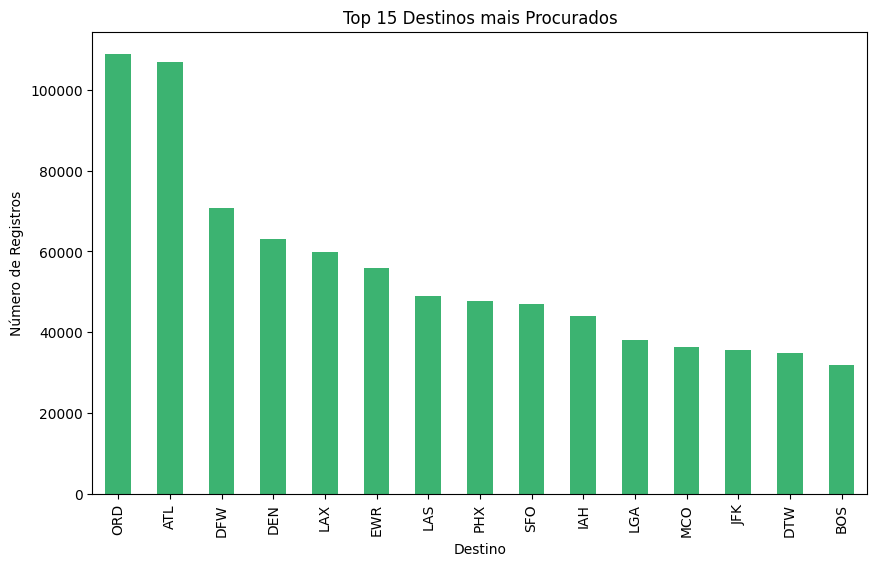

In [28]:
## Configurações do gráfico
plt.figure(figsize=(10, 6))
top_destinos = df['Dest'].value_counts().nlargest(15)

# Criando o gráfico de barras
top_destinos.plot(kind='bar', color='MediumSeaGreen')

# Adicionando rótulos e título
plt.title('Top 15 Destinos mais Procurados')
plt.xlabel('Destino')
plt.ylabel('Número de Registros')

# Exibindo o gráfico
plt.show()

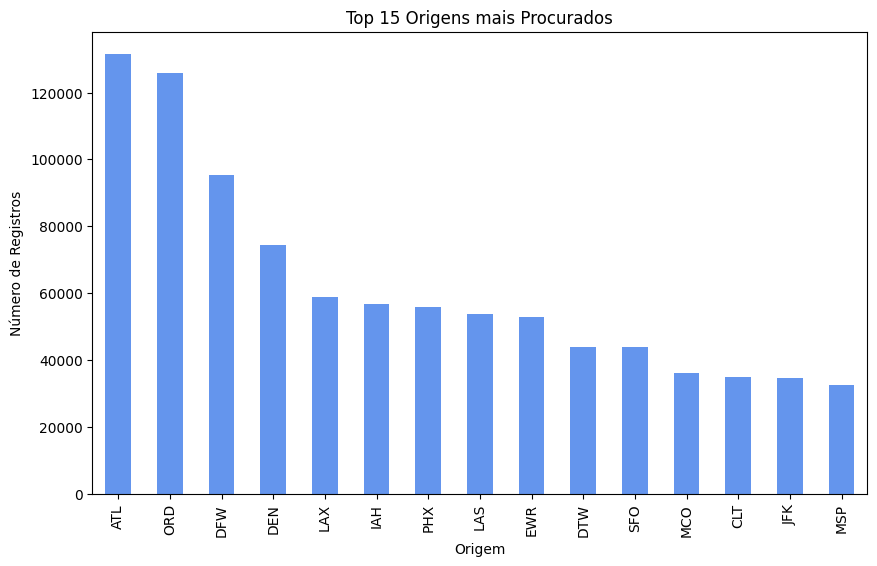

In [29]:
# Configurações do gráfico
plt.figure(figsize=(10, 6))
top_origens = df['Origin'].value_counts().nlargest(15)
# Criando o gráfico de barras
top_origens.plot(kind='bar', color='cornflowerblue')

# Adicionando rótulos e título
plt.title('Top 15 Origens mais Procurados')
plt.xlabel('Origem')
plt.ylabel('Número de Registros')

# Exibindo o gráfico
plt.show()

Com as análises realizadas, observamos que o dataframe original apresenta muitos outliers. Portanto, para evitar a perda de informações significativas, é mais relevante separar as análises em voos desviados, adiantados, atrasados, cancelados e sem atraso justificado. Para alguns casos será criado um novo arquivo zip.

### Voos Cancelados

In [30]:
voos_cancelados = df[df['Cancelled']==1]
voos_cancelados.head(4)

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,10,27,1,0.0,60.0,0.0,0.0,122.0,HOU,HRL,276,1,A,0,0.0,0.0,0.0,0.0,0.0
1546593,10,25,6,0.0,107.0,0.0,0.0,28.0,CLT,EWR,529,1,B,0,0.0,0.0,0.0,0.0,0.0
1547161,10,22,3,0.0,72.0,0.0,0.0,10.0,JAN,IAH,351,1,C,0,0.0,0.0,0.0,0.0,0.0
1547178,10,22,3,0.0,63.0,0.0,0.0,18.0,IAH,BTR,253,1,B,0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Excluindo colunas que não serão utilizadas na análise dos voos cancelados

voos_cancelados.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay',
                      'DepDelay','Distance','CarrierDelay','WeatherDelay',
                      'NASDelay','SecurityDelay','LateAircraftDelay','Diverted'],
                       axis=1, inplace=True)

In [32]:
voos_cancelados.to_csv('voos_cancelados.zip', index=False)

### Voos Desviados

In [33]:
voos_desviados = df[df['Diverted']==1]
voos_desviados.head(5)

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,1,3,4,0.0,95.0,0.0,0.0,7.0,SAN,SMF,480,0,N,1,0.0,0.0,0.0,0.0,0.0
1372,1,3,4,0.0,90.0,0.0,0.0,265.0,SFO,SAN,447,0,N,1,0.0,0.0,0.0,0.0,0.0
1776,1,4,5,0.0,65.0,0.0,0.0,44.0,BOI,RNO,335,0,N,1,0.0,0.0,0.0,0.0,0.0
1831,1,4,5,0.0,80.0,0.0,0.0,32.0,BUR,SMF,358,0,N,1,0.0,0.0,0.0,0.0,0.0
2244,1,4,5,0.0,85.0,0.0,0.0,139.0,LAS,RNO,345,0,N,1,0.0,0.0,0.0,0.0,0.0


In [34]:
voos_desviados.drop(['LateAircraftDelay', 'SecurityDelay', 
                     'ActualElapsedTime', 'AirTime', 'ArrDelay',
                     'NASDelay', 'WeatherDelay', 'CarrierDelay', 'Cancelled',
                     'CancellationCode', 'Distance', 'CRSElapsedTime', 'Diverted'], 
                       axis=1, inplace=True)

In [35]:
voos_desviados.to_csv('voos_desviados.zip', index=False)

### Voos sem Atrasos Justificados

In [37]:
voos_sem_atraso_justificado = df[(df['CarrierDelay'] == 0) & 
                                  (df['WeatherDelay'] == 0) &
                                  (df['NASDelay'] == 0) &
                                  (df['SecurityDelay'] == 0) &
                                  (df['LateAircraftDelay'] == 0)]              

Verificar valores de AirTime, ActualElapseTime e CRSElapsedTime que anteriormente não foi tratado totalmente para não eliminar voos cancelados e desviados.

In [38]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(voos_sem_atraso_justificado[voos_sem_atraso_justificado['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(voos_sem_atraso_justificado[voos_sem_atraso_justificado['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(voos_sem_atraso_justificado[voos_sem_atraso_justificado['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 8184
CRSElapsedTime 0
AirTime 8186


In [39]:
voos_sem_atraso_justificado = voos_sem_atraso_justificado[voos_sem_atraso_justificado['ActualElapsedTime']>0]
voos_sem_atraso_justificado = voos_sem_atraso_justificado[voos_sem_atraso_justificado['AirTime']>0]

In [40]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len( voos_sem_atraso_justificado[voos_sem_atraso_justificado['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len( voos_sem_atraso_justificado[voos_sem_atraso_justificado['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len( voos_sem_atraso_justificado[voos_sem_atraso_justificado['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 0


In [43]:
voos_sem_atraso_justificado

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,N,0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,N,0,0.0,0.0,0.0,0.0,0.0
6,1,3,4,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936739,12,13,6,110.0,122.0,91.0,3.0,15.0,MCI,ATL,692,0,N,0,0.0,0.0,0.0,0.0,0.0
1936740,12,13,6,264.0,271.0,238.0,3.0,10.0,PDX,ATL,2172,0,N,0,0.0,0.0,0.0,0.0,0.0
1936750,12,13,6,111.0,121.0,88.0,-1.0,9.0,MCI,ATL,692,0,N,0,0.0,0.0,0.0,0.0,0.0
1936756,12,13,6,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,N,0,0.0,0.0,0.0,0.0,0.0


In [44]:
voos_sem_atraso_justificado.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
                                  'LateAircraftDelay', 'Cancelled', 'CancellationCode',
                                  'Diverted'],axis=1, inplace=True)

In [45]:
voos_sem_atraso_justificado.to_csv('voos_sem_atraso_justificado.zip', index=False)